<a href="https://colab.research.google.com/github/danielacthomas2001/cs-uy-4613/blob/main/index_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Rides and the Poisson Model

To help the urban planners, you are called to model the daily bike rides in NYC using [this dataset](https://gist.github.com/sachinsdate/c17931a3f000492c1c42cf78bf4ce9fe/archive/7a5131d3f02575668b3c7e8c146b6a285acd2cd7.zip).  The dataset contains date, day of the week, high and low temp, precipitation and bike ride couunts as columns. 



## Maximum Likelihood I 
 
The obvious choice in distributions is the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) which depends only on one parameter, λ, which is the average number of occurrences per interval. We want to estimate this parameter using Maximum Likelihood Estimation.

Implement a Gradient Descent algorithm from scratch that will estimate the Poisson distribution according to the Maximum Likelihood criterion. Plot the estimated mean vs iterations to showcase convergence towards the true mean. 

References: 

1. [This blog post](https://towardsdatascience.com/the-poisson-process-everything-you-need-to-know-322aa0ab9e9a). 

2. [This blog post](https://towardsdatascience.com/understanding-maximum-likelihood-estimation-fa495a03017a) and note the negative  log likelihood function.  


Saving nyc_bb_bicyclist_counts.csv to nyc_bb_bicyclist_counts (17).csv


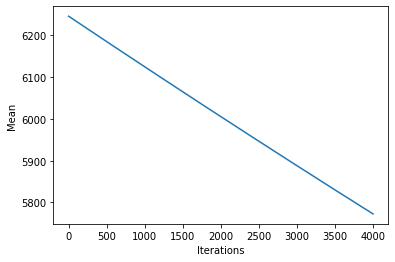

In [ ]:
# Code here

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('nyc_bb_bicyclist_counts.csv')
y = data['BB_COUNT'].values


n_epochs = 4000
eta = 0.001


#defines the negative log likelihood function
def negative_log_likelihood(lamd, y):
 
  return -np.sum(y/lamd-1)
  


#implements the gradient descent algorithim
def gradient_descent(y, learning_rate, n_epochs):
  lamd = np.random.rand()
 
  means = []
  for epoch in range(n_epochs):
    d_nll = negative_log_likelihood(lamd, y)
    lamd -= learning_rate * d_nll
    means.append(lamd)
  return lamd, means



lamd, means = gradient_descent(y, eta, n_epochs)
plt.plot(range(n_epochs), means)
plt.ylabel('Mean')
plt.xlabel('Iterations')
plt.show()
    


## Maximum Likelihood II

A colleague of yours suggest that the parameter $\lambda$ must be itself dependent on the weather and other factors since people bike when its not raining. Assume that you model $\lambda$ as 

$$\lambda_i = \exp(\mathbf w^T \mathbf x_i)$$

where $\mathbf x_i$ is one of the example features and $\mathbf w$ is a set of parameters. 

Train the model with SGD with this assumption and compare the MSE of the predictions with the `Maximum Likelihood I` approach. 

You may want to use [this partial derivative of the log likelihood function](http://home.cc.umanitoba.ca/~godwinrt/7010/poissonregression.pdf)

Saving nyc_bb_bicyclist_counts.csv to nyc_bb_bicyclist_counts (20).csv


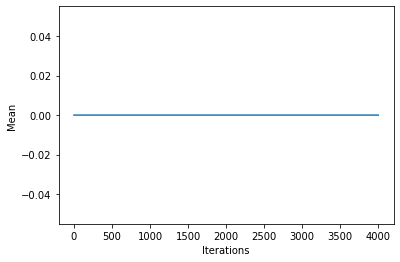

MSE:  7909742.387850467


In [ ]:
# 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('nyc_bb_bicyclist_counts.csv')
y = data['BB_COUNT'].values
n_epochs = 4000
eta = 0.001

# finds the gradient
def grad(w, x, y):
    l = np.exp(np.dot(x, w))
    return -np.dot(x.T, y - l) / 215 #use actual value 215 since y has no attribute len

#this function implements the stochastic gradient descent algorithim
def stochatic_gradient_descent(x, y, learning_rate, n_epochs):
    w = np.random.rand(x.shape[1])
    # List of the mean during each iteration
    means = []
    for epoch in range(n_epochs):
        rand_idx = np.random.permutation(len(y))
        y = y[rand_idx]
        x = x[rand_idx]
        for index in range(len(y)):
            xi = x[index]
            yi = y[index]
            w -= learning_rate * grad(w, xi, yi)
        means.append(np.mean(np.exp(np.dot(x, w))))
    return w, means


x = data[['HIGH_T']].values

# This line trains the model
w, means = stochatic_gradient_descent(x, y, eta, n_epochs)


plt.plot(range(n_epochs), means)
plt.ylabel('Mean')
plt.xlabel('Iterations')
plt.show()

# Mean Square Error predictions
y_prediction = np.exp(np.dot(x, w))
mse = np.mean(np.square(y - y_prediction))
print('Mean Square Error: ', mse)
